<a href="https://colab.research.google.com/github/maulik987/maulik/blob/main/College_Feedback_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt




In [ ]:
data = {
    "feedback": [
        "The professor explains concepts clearly.",
        "The classroom AC is broken again.",
        "Admin office delay is frustrating.",
        "Wi-Fi in hostel is not working.",
        "Assignments are not discussed properly.",
        "Cleanliness in the washroom is poor.",
        "Faculty is very supportive and helpful.",
        "No response from administration department.",
    ]
}

In [ ]:
df = pd.DataFrame(data)
df.to_csv("student_feedback.csv", index=False)


In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
labels = ["Academics", "Facilities", "Administration"]


In [ ]:
def classify_feedback(text):
    result = classifier(text, candidate_labels=labels)
    return result['labels'][0]

In [ ]:
df['category'] = df['feedback'].apply(classify_feedback)




In [ ]:
df.to_csv("classified_feedback.csv", index=False)
print(df)

                                      feedback        category
0     The professor explains concepts clearly.       Academics
1            The classroom AC is broken again.       Academics
2           Admin office delay is frustrating.  Administration
3              Wi-Fi in hostel is not working.      Facilities
4      Assignments are not discussed properly.  Administration
5         Cleanliness in the washroom is poor.      Facilities
6      Faculty is very supportive and helpful.      Facilities
7  No response from administration department.  Administration


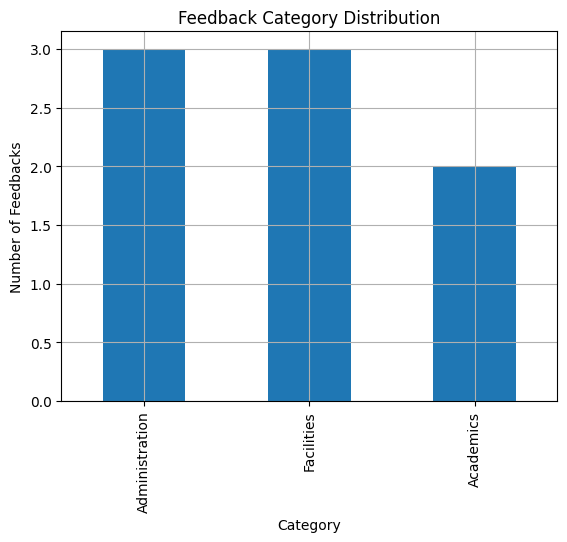

In [ ]:
df['category'].value_counts().plot(kind='bar', title='Feedback Category Distribution')
plt.xlabel("Category")
plt.ylabel("Number of Feedbacks")
plt.grid(True)
plt.show()